<a id='Capstone 2: National Transit Database'></a>

# Capstone 2: *Predicting Public Transportation Safety Risk*
## *Data Wrangling*
***


## 1.1 Table of Contents<a id='1.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Table of Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
  * [1.3 Data Dictionary](#1.3_Data_Dictionary)
  * [1.4 Importing the Dependencies](#1.4_Importing_the_Dependencies)
  * [1.5 Importing the Data](#1.5_Importing_the_Data)
  * [1.6 Exploring the Data](#1.6_Exploring_the_Data)
      * [1.6.1 Missing Data](#1.6.1_Missing_Data)
          * [1.6.1.1 The Three Unique Identifier Columns](#1.6.1.1_The_Three_Unique_Identifier_Columns)
              * [1.6.1.1.1 Finding NaNs and Other Forms of Missing Data](#1.6.1.1.1_Finding_NaNs_and_Other_Forms_of_Missing_Data)
              * [1.6.1.1.2 Removing the Rows of Data](#1.6.1.1.2_Removing_the_Rows_of_Data)
          * [1.6.1.2 Primary UZA Name, Sq Miles, and Population](#1.6.1.2_Primary_UZA_Name_Sq_Miles_and_Population)
              * [1.6.1.2.1 Finding a Data Source](#1.6.1.2.1_Finding_a_Data_Source)
              * [1.6.1.2.2 Filling the NaNs](#1.6.1.2.2_Filling_the_NaNs)
          * [1.6.1.3 Organization Type, Service Area Sq Miles, and Service Area Population](#1.6.1.3_Organization_Type_Service_Sq_Miles_and_Service_Area_Population)
          * [1.6.1.4 The East Central Iowa Council of Governments](#1.6.1.4_The_East_Central_Iowa_Council_of_Governments)
      * [1.6.2 Determining the Primary Identifier](#1.6.2_Determining_the_Primary_Identifier)
          * [1.6.2.1 Comparing '5 DIgit NTD ID' and '4 Digit NTD ID'](#1.6.2.1_Comparing_5_DIgit_NTD_ID_and_4_Digit_NTD_ID)
          * [1.6.2.2 Comparing '5 DIgit NTD ID' and 'Agency'](#1.6.2.2_Comparing_5_DIgit_NTD_ID_and_Agency)
          * [1.6.2.3 The Winning Combination](#1.6.2.3_The_Winning_Combination)     
      * [1.6.3 Changing Data Type of 'Rail (Y/N)' Column](#1.6.3_Rail)
  * [1.7 Save Data](#1.7_Save_Data)      
  * [1.8 Summary](#1.8_Summary)

## 1.2 Introduction
<a id='1.2_Introduction'></a>

When states find their metropolitan areas growing both in population and in spread, they often begin to consider additions to or expansions of their public transportation options.    The Nashville Metropolitan Area in Tennessee is in such a situation.  They built a 2.1 million square foot convention center in 2013 to host both local and international events, but limited public transportation options are available between the convention center and the airport.   The Nashville Department of Transportation and Multimodal Infrastructure is considering adding additional public transportation between the two to help reduce the pressure on the congested roadways.  They would like to understand the safety implications of doing so as part of their decision-making process. 

The National Transit Database (NTD) is a Monthly Modal Time Series database from the Federal Transit Administration (FTA) containing over 133,000 rows of data from 2014 to the present day.  Each row of data contains the number of accidents, injuries, fatalities, or other events which occurred in each category during a given month for a particular agency.  


## 1.3 Data Dictionary
<a id='1.3_Data_Dictionary'></a>

**Note:** *This table contains only the columns which benefitted from further explanation.  For a complete list of columns, please refer to section 1.5 of this notebook.*



| Column Name | Definition      [FTA Glossary link](https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary)|
|:---------|:-------------|
|5 DIgit NTD ID|National Transit Database ID number currently in use|
|4 Digit NTD ID|Legacy ID number|
|Agency| Name of the Reporting Agency|
|Organization Type|Distinguishes between government, private, and independent public agencies|
|Mode [Definitions](https://www.ftis.org/iNTD-Urban/modes.pdf)|AR: Alaska Railroad|
||CB: Commuter Bus|
||CC: Cable Car|
||CR: Commuter Rail
||DR: Demand Response|
||FB: Ferryboat|
||HR: Heavy Rail|
||IP: Inclined Plane|
||LR: Light Rail|
||MB: Bus|
||MG: Monorail and Automated Guideway|
||PB: Publico|
||RB: Bus Rapid Transit|
||SR: Streetcar Rail|
||TB: Trolleybus|
||TR: Aerial Tramway|
||VP: Vanpool|
||YR: Hybrid Rail
|Type of Service|DO: Directly Operated|
||PT: Purchased Transportation|
||TX: Taxi|
||TN: Transit Network Company (new TOS effective Sept 2019) [NTD Guidance](https://www.transit.dot.gov/sites/fta.dot.gov/files/docs/NTD%202108%20FRN%20Webinar%20Presentation.pdf)|
|Primary UZA Code|*(see note below table)* Numerical ranking by urbanized area population size| 
|Primary UZA Name|*(see note below table)*|
|Primary UZA Sq Miles|*(see note below table)*|
|Primary UZA Population|*(see note below table)*|

**NTD:** National Transit Database

**FTA:** Federal Transit Authority

**Urbanized Area (UZA):** An urbanized area is an incorporated area with a population of 50,000 or more that is designated as such by the U.S. Department of Commerce, Bureau of the Census.
The Census Bureau delineates urban areas after each decennial census by applying specified criteria to decennial census and other data.

**Non-Rail Modes:**
Transit modes whose vehicles typically operate on roadways - streets, highways or expressways, but may also operate on waterways (ferryboat (FB)) or via aerial cable (aerial tramways (TR)). Vehicles are typically powered by motors onboard the vehicle, with one exception, aerial tramway (TR) vehicles which are electrically powered by a motor not onboard the vehicle in order to pull the vehicle via an overhead cable. 
1.   Aerial Tramway (TR)
2.   Bus (MB)
3.   Bus rapid transit (RB)
4.   Commuter bus (CB)
5.   Demand Response (DR)
6.   Demand taxi (DT)
7.   Ferryboat (FB)
8.   Jitney (JT)
9.   Publico (PB)
10.   Trolleybus (TB), and
11.   Vanpool (VP).


## 1.4 Importing the Dependencies
<a id='1.4_Importing_the_Dependencies'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 70)

## 1.5 Importing the Data
<a id='1.5_Importing_the_Data'></a>

[National Transit Database (NTD) Monthly Modal Time Series Information Page](https://datahub.transportation.gov/Public-Transit/Monthly-Modal-Time-Series/5ti2-5uiv)

[National Transit Database (NTD) Monthly Modal Time Series Data](https://datahub.transportation.gov/Public-Transit/Monthly-Modal-Time-Series/5ti2-5uiv/data)

<div class="alert alert-info">
  <strong>Note:</strong> There are NANs in 'Rail (Y/N) so I cannot change the data type to bool right now.  This will be addressed later in the notebook.</a>
</div>


In [2]:
file = 'Monthly_Modal_Time_Series.csv'
data = pd.read_csv(file, dtype={'5 DIgit NTD ID': str, '4 Digit NTD ID': str})
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133196 entries, 0 to 133195
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   5 DIgit NTD ID                              133196 non-null  object 
 1   4 Digit NTD ID                              130151 non-null  object 
 2   Agency                                      133148 non-null  object 
 3   Organization Type                           128819 non-null  object 
 4   Mode                                        133148 non-null  object 
 5   Type of Service                             133148 non-null  object 
 6   Rail (Y/N)                                  133148 non-null  object 
 7   Primary UZA Code                            133196 non-null  int64  
 8   Primary UZA Name                            128807 non-null  object 
 9   Primary UZA Sq Miles                        128855 non-null  float64
 

/var/folders/b_/wjqzr1wd3b71cyr3q4f2zts40000gn/T/ipykernel_37739/2416012665.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, dtype={'5 DIgit NTD ID': str, '4 Digit NTD ID': str})


In [3]:
data.shape

(133196, 65)

In [4]:
data.head()

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
0,00008,0008,Tri-County Metropolitan Transportation Distric...,Independent Public Agency or Authority of Tran...,LR,DO,True,24,"Portland, OR-WA",524.0,...,0,0,0,0,1,0,0,0,1,1
1,00008,0008,Tri-County Metropolitan Transportation Distric...,Independent Public Agency or Authority of Tran...,MB,DO,False,24,"Portland, OR-WA",524.0,...,0,1,0,0,3,0,0,0,4,11
2,20008,2008,MTA New York City Transit,"Subsidiary Unit of a Transit Agency, Reporting...",DR,PT,False,1,"New York-Newark, NY-NJ-CT",3450.0,...,1,2,0,0,6,0,0,0,9,17
3,20008,2008,MTA New York City Transit,"Subsidiary Unit of a Transit Agency, Reporting...",HR,DO,True,1,"New York-Newark, NY-NJ-CT",3450.0,...,0,0,0,0,0,0,0,2,2,9
4,20008,2008,MTA New York City Transit,"Subsidiary Unit of a Transit Agency, Reporting...",MB,DO,False,1,"New York-Newark, NY-NJ-CT",3450.0,...,1,2,0,2,21,0,0,0,27,42


**Visualizing a single entry**  This data was reported by Tri-County Metropolitan Transportation District for the month of January, 2014, and contains the number of accidents, injuries, or fatalities which occurred in their service area in each category during that month.

In [5]:
data[data.index==1].T

,1
5 DIgit NTD ID,00008
4 Digit NTD ID,0008
Agency,Tri-County Metropolitan Transportation Distric...
Organization Type,Independent Public Agency or Authority of Tran...
Mode,MB
Type of Service,DO
Rail (Y/N),False
Primary UZA Code,24
Primary UZA Name,"Portland, OR-WA"
Primary UZA Sq Miles,524.0


## 1.6 Exploring the Data
<a id='1.6_Exploring_the_Data'></a>

### 1.6.1 Missing Data
<a id='1.6.1_Missing_Data'></a>

Overview of missing data in the dataframe.

In [6]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', 'percent']
missing.sort_values(by='percent', ascending=False)

,count,percent
Primary UZA Name,4389,3.295144
Organization Type,4377,3.286135
Primary UZA Sq Miles,4341,3.259107
Primary UZA Population,4341,3.259107
Service Area Sq Miles,4236,3.180276
Service Area Population,4236,3.180276
4 Digit NTD ID,3045,2.286105
Rail (Y/N),48,0.036037
Type of Service,48,0.036037
Mode,48,0.036037


Visualizing the missing data.

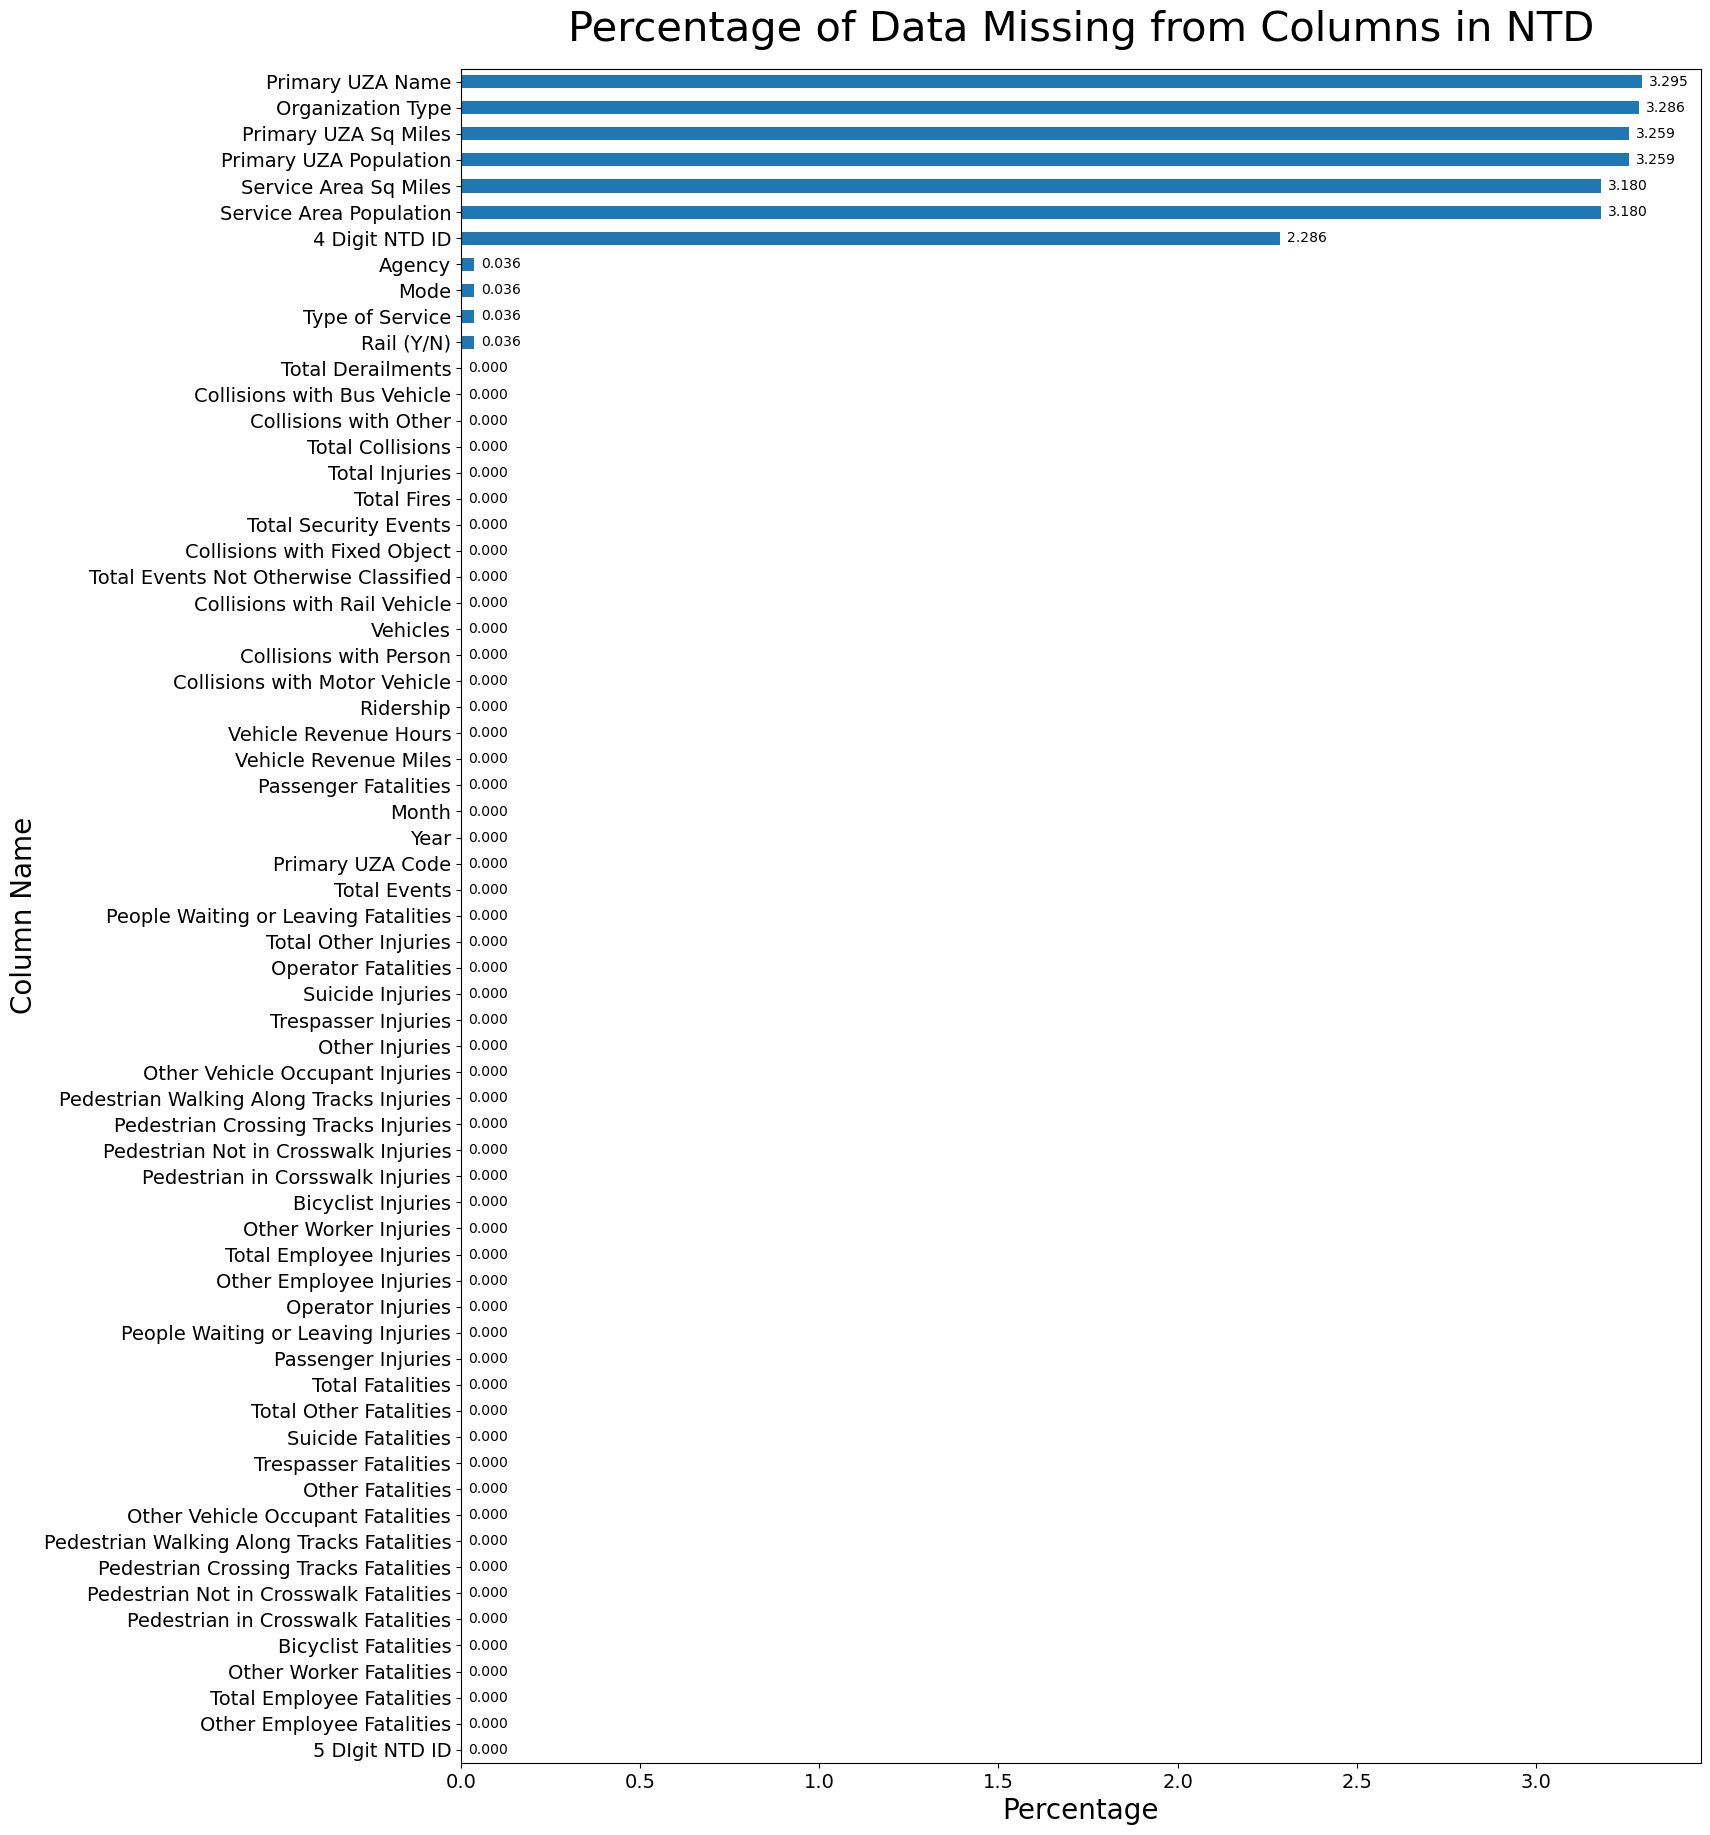

In [7]:
missingpercent = (100 * data.isnull().mean())

plt.figure(figsize=(16,22))
ax = missingpercent.sort_values(ascending=True).plot(kind='barh', fontsize=14)
ax.set_title('Percentage of Data Missing from Columns in NTD', fontsize=30, pad=20)
ax.set_xlabel('Percentage', fontsize=20)
ax.set_ylabel('Column Name', fontsize=20)


# Function below adapted from (https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart)

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart."""

# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with three decimal places
    label = "{:.3f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

# Call the function
add_value_labels(ax)

#### 1.6.1.1 The Three Unique Identifier Columns
<a id='1.6.1.1_The_Three_Unique_Identifier_Columns'></a>

The '5 DIgit NTD ID', '5 Digit NTD ID', and 'Agency' columns all have the possibility of being used as unique identifyers for this project.  In this section of the notebook, I'll explore these columns to make sure each row has data in at least one of those fields, I'll check for accuracy and oddities, and I'll see if any missing data in those fields can be discovered elsewhere and added in a responsible way.

##### 1.6.1.1.1 Finding NaNs and Other Forms of Missing Data
<a id='1.6.1.1.1_Finding_NaNs_and_Other_Forms_of_Missing_Data'></a>

As seen in the visualization above, there are no NaNs in the '5 DIgit NTD ID' field.

In [8]:
data[data['5 DIgit NTD ID'].isna()]

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries


When looking at the pairings of '5 DIgit NTD ID' and 'Agency', a quotation mark is found for "5 DIgit NTD ID" at index 246.

In [9]:
data[['5 DIgit NTD ID', 'Agency']].drop_duplicates().sort_values('5 DIgit NTD ID').head(50)

,5 DIgit NTD ID,Agency
246,"""",NaN
9564,00001,King County Department of Metro Transit
3874,00002,Spokane Transit Authority
4828,00003,Pierce County Transportation Benefit Area Auth...
6770,00005,City of Everett
7897,00006,City of Yakima
4855,00007,Lane Transit District
0,00008,Tri-County Metropolitan Transportation Distric...
8599,00011,Valley Regional Transit
6741,00012,Municipality of Anchorage


A search for additional quotation marks in the '5 DIgit NTD ID' field reveals a total of 48 rows.

In [10]:
data[data['5 DIgit NTD ID']==r'"']

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
246,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
247,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
248,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122815,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122816,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122817,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122818,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
125320,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,1,0,0,0,1,1
125321,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
125322,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,1,1


Searching for NaNs in 'Agency' reveals the same 48 rows.  Since these rows contain no useful way to identify where the data is coming from (ie. no agency name, id number, or even organization or service type or mode) these rows are not useful for this project and can be removed.

In [11]:
data[data['Agency'].isna()]

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
246,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
247,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
248,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122815,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122816,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122817,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
122818,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
125320,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,1,0,0,0,1,1
125321,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,0
125322,"""",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,...,0,0,0,0,0,0,0,0,1,1


##### 1.6.1.1.2 Removing the Rows of Data
<a id='1.6.1.1.2_Removing_the_Rows_of_Data'></a>

In [12]:
data = data[data['Agency'].notna()]

Checking to make sure the data has been removed.

In [13]:
data[data['Agency'].isna()]

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries


In [14]:
data[data['5 DIgit NTD ID']==r'"']

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries


#### 1.6.1.2 Primary UZA Name, Sq Miles, and Population
<a id='1.6.1.2_Primary_UZA_Name_Sq_Miles_and_Population'></a>


There are currently 4341 rows missing data for the 'Primary UZA Name', 'Primary UZA Sq Miles', and 'Primary UZA Population' columns.  

In [15]:
data['Primary UZA Name'].isnull().sum()

4341

In [16]:
data['Primary UZA Sq Miles'].isnull().sum()

4341

In [17]:

data['Primary UZA Population'].isnull().sum()

4341

##### 1.6.1.2.1 Finding a Data Source
<a id='1.6.1.2.1_Finding_a_Data_Source'></a>


There are 241 unique '5 DIgit NTD ID's where 'Primary UZA Name' is null.

In [18]:

dfisna = data[data['Primary UZA Name'].isnull()].sort_values('5 DIgit NTD ID')
dfisna['5 DIgit NTD ID'].nunique()


241

Let's see how many of the '5 DIgit NTD ID's above have non-null data for 'Primary UZA Name' elsewhere in the dataframe.

In [19]:
# make another dataframe which contains unique 5 Digit IDs with Primary UZA Names (not NaN)

dfisnotna = data[data['Primary UZA Name'].notna()]
dfisnotna = dfisnotna[['5 DIgit NTD ID', 'Primary UZA Name']].drop_duplicates().sort_values('5 DIgit NTD ID')
dfisnotna

,5 DIgit NTD ID,Primary UZA Name
9564,00001,"Seattle, WA"
3874,00002,"Spokane, WA"
4828,00003,"Seattle, WA"
6770,00005,"Seattle, WA"
7897,00006,"Yakima, WA"
...,...,...
36810,91092,"Lake Tahoe, CA-NV"
58760,99422,"Stockton, CA"
28663,99423,"Los Angeles-Long Beach-Anaheim, CA"
61236,99424,"Los Angeles-Long Beach-Anaheim, CA"


In [20]:
# visualize the dataframe which contains unique 5 Digit IDs without Primary UZA Names (NaN)

dfisna = dfisna[['5 DIgit NTD ID', 'Primary UZA Name']].drop_duplicates().sort_values('5 DIgit NTD ID')
dfisna


,5 DIgit NTD ID,Primary UZA Name
117267,00001,NaN
118081,00002,NaN
119722,00003,NaN
117746,00005,NaN
120585,00006,NaN
...,...,...
122497,80285,NaN
109772,90182,NaN
108439,90213,NaN
112699,90244,NaN


We can see that 240 of the 241 unique '5 DIgit NTD ID's appear both with and without 'Primary UZA Name's in the original dataframe.

In [21]:
#inner join dfisnotna and dfisna on 5 dig ID to see which/how many 5 dig IDs appear in both.

is_isnot = pd.merge(dfisnotna,dfisna, how='inner', on = '5 DIgit NTD ID')
is_isnot = is_isnot[['5 DIgit NTD ID']].drop_duplicates().sort_values('5 DIgit NTD ID')
is_isnot['5 DIgit NTD ID'].nunique()


240

##### 1.6.1.2.2 Filling the NaNs
<a id='1.6.1.2.2_Filling_the_NaNs'></a>



The available data from the other rows in the dataframe will be used to fill the NaNs in the rows with missing data in the 'Primary UZA Name' column.  

Visualizing some of the missing data in these three fields for comparing before and after the NaNs are treated.

In [22]:
data[['5 DIgit NTD ID','Primary UZA Name', 'Primary UZA Sq Miles', 'Primary UZA Population']].sort_values('5 DIgit NTD ID').head(30)


,5 DIgit NTD ID,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population
72395,00001,"Seattle, WA",1010.0,3059393.0
131493,00001,"Seattle, WA",1010.0,3059393.0
131492,00001,"Seattle, WA",1010.0,3059393.0
131491,00001,"Seattle, WA",1010.0,3059393.0
131490,00001,"Seattle, WA",1010.0,3059393.0
131489,00001,"Seattle, WA",1010.0,3059393.0
131488,00001,"Seattle, WA",1010.0,3059393.0
131487,00001,"Seattle, WA",1010.0,3059393.0
131486,00001,"Seattle, WA",1010.0,3059393.0
131485,00001,"Seattle, WA",1010.0,3059393.0


Treating the NaNs in 'Primary UZA Name' by filling with data found elsewhere in the dataframe where possible.

In [23]:
first = data.groupby('5 DIgit NTD ID')['Primary UZA Name'].first()
data['Primary UZA Name'] = data['Primary UZA Name'].fillna(data['5 DIgit NTD ID'].map(first))
data[['5 DIgit NTD ID','Primary UZA Name']].sort_values('5 DIgit NTD ID').head(30)

,5 DIgit NTD ID,Primary UZA Name
72395,00001,"Seattle, WA"
131493,00001,"Seattle, WA"
131492,00001,"Seattle, WA"
131491,00001,"Seattle, WA"
131490,00001,"Seattle, WA"
131489,00001,"Seattle, WA"
131488,00001,"Seattle, WA"
131487,00001,"Seattle, WA"
131486,00001,"Seattle, WA"
131485,00001,"Seattle, WA"


Making sure the data filled correctly by looping through the grouped '5 DIgit NTD ID's to see if the first and last sorted 'Primary UZA Names' match.

In [24]:
df = data[['5 DIgit NTD ID', 'Primary UZA Name']]

In [25]:
min_i = df.groupby('5 DIgit NTD ID')['Primary UZA Name'].first()
min_i = pd.DataFrame(min_i)
min_i.head()

,Primary UZA Name
5 DIgit NTD ID,
00001,"Seattle, WA"
00002,"Spokane, WA"
00003,"Seattle, WA"
00005,"Seattle, WA"
00006,"Yakima, WA"


In [26]:
max_i = df.groupby('5 DIgit NTD ID')['Primary UZA Name'].last()
max_i = pd.DataFrame(max_i)
max_i.head()

,Primary UZA Name
5 DIgit NTD ID,
00001,"Seattle, WA"
00002,"Spokane, WA"
00003,"Seattle, WA"
00005,"Seattle, WA"
00006,"Yakima, WA"


In [27]:
df2 = min_i.merge(max_i, how='inner', on=('5 DIgit NTD ID'), suffixes=('_min', '_max'))
df2 = df2.replace({np.nan: None})
df2.head()

,Primary UZA Name_min,Primary UZA Name_max
5 DIgit NTD ID,,
00001,"Seattle, WA","Seattle, WA"
00002,"Spokane, WA","Spokane, WA"
00003,"Seattle, WA","Seattle, WA"
00005,"Seattle, WA","Seattle, WA"
00006,"Yakima, WA","Yakima, WA"


In [28]:
for x in range(len(df2)):
    if df2['Primary UZA Name_min'][x] != df2['Primary UZA Name_max'][x]:
        print('\nmin not equal to max for x =', x)
        print('5 DIgit NTD ID is:', df2.index[x])
        print('min is:', df2['Primary UZA Name_min'][x])
        print('max is:',df2['Primary UZA Name_max'][x])



min not equal to max for x = 124
5 DIgit NTD ID is: 20193
min is: Philadelphia, PA-NJ-DE-MD
max is: Vineland, NJ

min not equal to max for x = 132
5 DIgit NTD ID is: 20223
min is: Villas, NJ
max is: Philadelphia, PA-NJ-DE-MD

min not equal to max for x = 406
5 DIgit NTD ID is: 50522
min is: Detroit, MI
max is: Monroe, MI


Three '5 DIgit NTD ID's each have two 'Primary UZA Name's.  Confirming this below.

In [29]:
df2.loc[df2.index == '20193']


,Primary UZA Name_min,Primary UZA Name_max
5 DIgit NTD ID,,
20193,"Philadelphia, PA-NJ-DE-MD","Vineland, NJ"


In [30]:
df2.loc[df2.index == '20223']

,Primary UZA Name_min,Primary UZA Name_max
5 DIgit NTD ID,,
20223,"Villas, NJ","Philadelphia, PA-NJ-DE-MD"


In [31]:
df2.loc[df2.index == '50522']

,Primary UZA Name_min,Primary UZA Name_max
5 DIgit NTD ID,,
50522,"Detroit, MI","Monroe, MI"


A count is taken of the number of occurrances of each 'Primary UZA Name' for the three '5 DIgit NTD ID's.

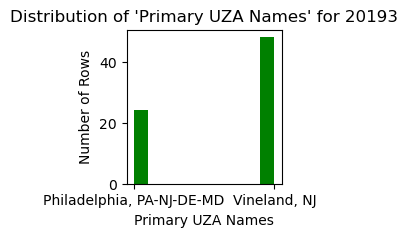

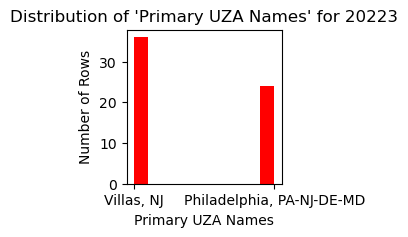

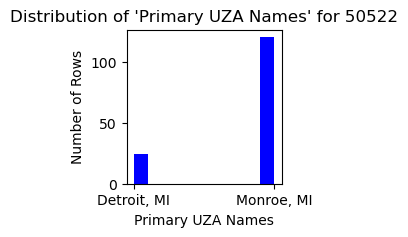

In [32]:
# https://www.transit.dot.gov/sites/fta.dot.gov/files/transit_agency_profile_doc/2021/20193.pdf

A = data.loc[data['5 DIgit NTD ID']=='20193']
A = A[['5 DIgit NTD ID', 'Primary UZA Name']]

B = data.loc[data['5 DIgit NTD ID']=='20223']
B = B[['5 DIgit NTD ID', 'Primary UZA Name']]

C = data.loc[data['5 DIgit NTD ID']=='50522']
C = C[['5 DIgit NTD ID', 'Primary UZA Name']]

plt.figure(figsize=(2,2))
_ = plt.hist(A['Primary UZA Name'], color='g')
_ = plt.xlabel('Primary UZA Names')
_ = plt.ylabel('Number of Rows')
_ = plt.title("Distribution of 'Primary UZA Names' for 20193")

plt.show()

plt.figure(figsize=(2,2))
_ = plt.hist(B['Primary UZA Name'], color='r')
_ = plt.xlabel('Primary UZA Names')
_ = plt.ylabel('Number of Rows')
_ = plt.title("Distribution of 'Primary UZA Names' for 20223")

plt.figure(figsize=(2,2))
_ = plt.hist(C['Primary UZA Name'], color='b')
_ = plt.xlabel('Primary UZA Names')
_ = plt.ylabel('Number of Rows')
_ = plt.title("Distribution of 'Primary UZA Names' for 50522")


Researching the FTA webiste confirms these are not errors.  The three '5 DIgit NTD ID's above which each have two different 'Primary UZA Names' serve and report for both as listed.  Documentation for each can be found at the links below:

20193: [Cumberland County](https://www.transit.dot.gov/sites/fta.dot.gov/files/transit_agency_profile_doc/2021/20193.pdf)

20223: [Cape May Lewes Ferry](https://www.transit.dot.gov/sites/fta.dot.gov/files/transit_agency_profile_doc/2021/20223.pdf)

50522: [Lake Erie Transportation Commission](https://www.transit.dot.gov/sites/fta.dot.gov/files/transit_agency_profile_doc/2021/50522.pdf)

Taking alook to see how many rows are still missing a 'Primary UZA Name'.

In [33]:
data['Primary UZA Name'].isnull().sum()

27

The 27 rows which are still missing a 'Primary UZA Name' are all associated with the same '5 DIgit NTD ID'. This is the single '5 DIgit NTD ID' (out of the 241) that did not appear both with and without data in the dataframe.

In [34]:
dfisna = data[data['Primary UZA Name'].isnull()].sort_values('5 DIgit NTD ID')
dfisna

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
122949,70138,7R01-010,East Central Iowa Council of Governments,NaN,VP,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
124519,70138,7R01-010,East Central Iowa Council of Governments,NaN,DR,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
124518,70138,7R01-010,East Central Iowa Council of Governments,NaN,DR,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
124517,70138,7R01-010,East Central Iowa Council of Governments,NaN,DR,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
124516,70138,7R01-010,East Central Iowa Council of Governments,NaN,DR,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
124515,70138,7R01-010,East Central Iowa Council of Governments,NaN,DR,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
124514,70138,7R01-010,East Central Iowa Council of Governments,NaN,DR,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
124513,70138,7R01-010,East Central Iowa Council of Governments,NaN,DR,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
122966,70138,7R01-010,East Central Iowa Council of Governments,NaN,CB,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0
122965,70138,7R01-010,East Central Iowa Council of Governments,NaN,CB,PT,False,0,None,NaN,...,0,0,0,0,0,0,0,0,0,0


The original dataframe contains 27 rows of data from The East Central Iowa Council of Governments, but none of those rows of data contain information for the 'Primary UZA Name'.  So, the NaNs still remain.

Additionally, there is no data in the dataframe for 'Primary UZA Sq Miles' or 'Primary UZA Population' so 27 rows of missing data will remain after treating the other NaNs in those two columns.

Further, the same issue will arrive in the next section of the notebook when treating the NaNs in 'Organization Type', 'Service Area Sq Miles', and 'Service Area Population'.

In [35]:
data[data['5 DIgit NTD ID']=='70138'].notnull().sum()

5 DIgit NTD ID                                27
4 Digit NTD ID                                27
Agency                                        27
Organization Type                              0
Mode                                          27
Type of Service                               27
Rail (Y/N)                                    27
Primary UZA Code                              27
Primary UZA Name                               0
Primary UZA Sq Miles                           0
Primary UZA Population                         0
Service Area Sq Miles                          0
Service Area Population                        0
Year                                          27
Month                                         27
Vehicles                                      27
Vehicle Revenue Miles                         27
Vehicle Revenue Hours                         27
Ridership                                     27
Collisions with Motor Vehicle                 27
Collisions with Pers

Treating the NaNs in 'Primary UZA Sq Miles' by filling with data found elsewhere in the dataframe where possible.

In [36]:
first = data.groupby('5 DIgit NTD ID')['Primary UZA Sq Miles'].first()
data['Primary UZA Sq Miles'] = data['Primary UZA Sq Miles'].fillna(data['5 DIgit NTD ID'].map(first))


In [37]:
data['Primary UZA Sq Miles'].isnull().sum()

27

Treating the NaNs in 'Primary UZA Population' by filling with data found elsewhere in the dataframe where possible.

In [38]:
first = data.groupby('5 DIgit NTD ID')['Primary UZA Population'].first()
data['Primary UZA Population'] = data['Primary UZA Population'].fillna(data['5 DIgit NTD ID'].map(first))


In [39]:
data['Primary UZA Population'].isnull().sum()

27

Visualizing the same snapshot of data from the beginning of this section now that the NaNs have been treated.

In [40]:
data[['5 DIgit NTD ID','Primary UZA Name', 'Primary UZA Sq Miles', 'Primary UZA Population']].sort_values('5 DIgit NTD ID').head(30)


,5 DIgit NTD ID,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population
72395,00001,"Seattle, WA",1010.0,3059393.0
131493,00001,"Seattle, WA",1010.0,3059393.0
131492,00001,"Seattle, WA",1010.0,3059393.0
131491,00001,"Seattle, WA",1010.0,3059393.0
131490,00001,"Seattle, WA",1010.0,3059393.0
131489,00001,"Seattle, WA",1010.0,3059393.0
131488,00001,"Seattle, WA",1010.0,3059393.0
131487,00001,"Seattle, WA",1010.0,3059393.0
131486,00001,"Seattle, WA",1010.0,3059393.0
131485,00001,"Seattle, WA",1010.0,3059393.0


#### 1.6.1.3 Organization Type, Service Sq Miles, and Service Area Population
<a id='1.6.1.3_Organization_Type_Service_Sq_Miles_and_Service_Area_Population'></a>

There are currently thousands of rows of missing data for 'Organization Type', 'Service Area Sq Miles', and 'Service Area Population'.  

In [41]:
data['Organization Type'].isnull().sum()

4329

In [42]:
data['Service Area Sq Miles'].isnull().sum()

4236

In [43]:
data['Service Area Population'].isnull().sum()

4236

Visualizing some of the missing data in these three fields for comparing before and after the NaNs are treated.

In [44]:
data[['5 DIgit NTD ID','Organization Type', 'Service Area Sq Miles', 'Service Area Population']].sort_values('5 DIgit NTD ID').head(30)


,5 DIgit NTD ID,Organization Type,Service Area Sq Miles,Service Area Population
72395,00001,"City, County or Local Government Unit or Depar...",2134.0,2149970.0
131493,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131492,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131491,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131490,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131489,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131488,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131487,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131486,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131485,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0


Treating the NaNs in the three fields by filling with data found elsewhere in the dataframe where possible.

In [45]:
first = data.groupby('5 DIgit NTD ID')['Organization Type'].first()
data['Organization Type'] = data['Organization Type'].fillna(data['5 DIgit NTD ID'].map(first))


In [46]:
first = data.groupby('5 DIgit NTD ID')['Service Area Sq Miles'].first()
data['Service Area Sq Miles'] = data['Service Area Sq Miles'].fillna(data['5 DIgit NTD ID'].map(first))


In [47]:
first = data.groupby('5 DIgit NTD ID')['Service Area Population'].first()
data['Service Area Population'] = data['Service Area Population'].fillna(data['5 DIgit NTD ID'].map(first))


Visualizing the same snapshot of data after the NaNs have been treated.

In [48]:
data[['5 DIgit NTD ID','Organization Type', 'Service Area Sq Miles', 'Service Area Population']].sort_values('5 DIgit NTD ID').head(30)

,5 DIgit NTD ID,Organization Type,Service Area Sq Miles,Service Area Population
72395,00001,"City, County or Local Government Unit or Depar...",2134.0,2149970.0
131493,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131492,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131491,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131490,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131489,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131488,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131487,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131486,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0
131485,00001,"City, County or Local Government Unit or Depar...",2134.0,2287050.0


In [49]:

data['Organization Type'].isnull().sum()

27

In [50]:
data['Service Area Sq Miles'].isnull().sum()

27

In [51]:
data['Service Area Population'].isnull().sum()

27

#### 1.6.1.4 The East Central Iowa Council of Governments
<a id='1.6.1.4_The_East_Central_Iowa_Council_of_Governments'></a>             
              

What can I do about the 27 rows from The East Central Iowa Council of Governments ('5 DIgit NTD ID' 70138) which still contain nans?

In [52]:
#Identifying which columns have nans

temp = data[data['5 DIgit NTD ID']==70138].isna().sum()
temp[data[data['5 DIgit NTD ID']==70138].isna().sum() > 0]


Series([], dtype: float64)

In [53]:
# Missing values found through NTD Website
values = {"Organization Type": "MPO, COG or Other Planning Agency", "Primary UZA Name": "Iowa City, IA", "Primary UZA Sq Miles": 46, "Primary UZA Population": 106621, "Service Area Sq Miles": 26, "Service Area Population": 74950}

data= data.fillna(value=values)

#Checking for any remaining NaNs
temp2 = data[data['5 DIgit NTD ID']==70138].isna().sum()
temp2[data[data['5 DIgit NTD ID']==70138].isna().sum() > 0]

Series([], dtype: float64)

Although the missing information was not found elsewhere in the dataframe, I was able to locate the correct information for The East Central Iowa Council of Governments through the [FTA Data for 70138](https://www.transit.dot.gov/sites/fta.dot.gov/files/transit_agency_profile_doc/2021/70138.pdf).  So, I have manually filled the cells with the appropriate data.


Revisiting the graphic from the beginning of this section to show the progress made toward reducing the amount of missing data in the dataframe.

Text(0, 0.5, 'Column Name')

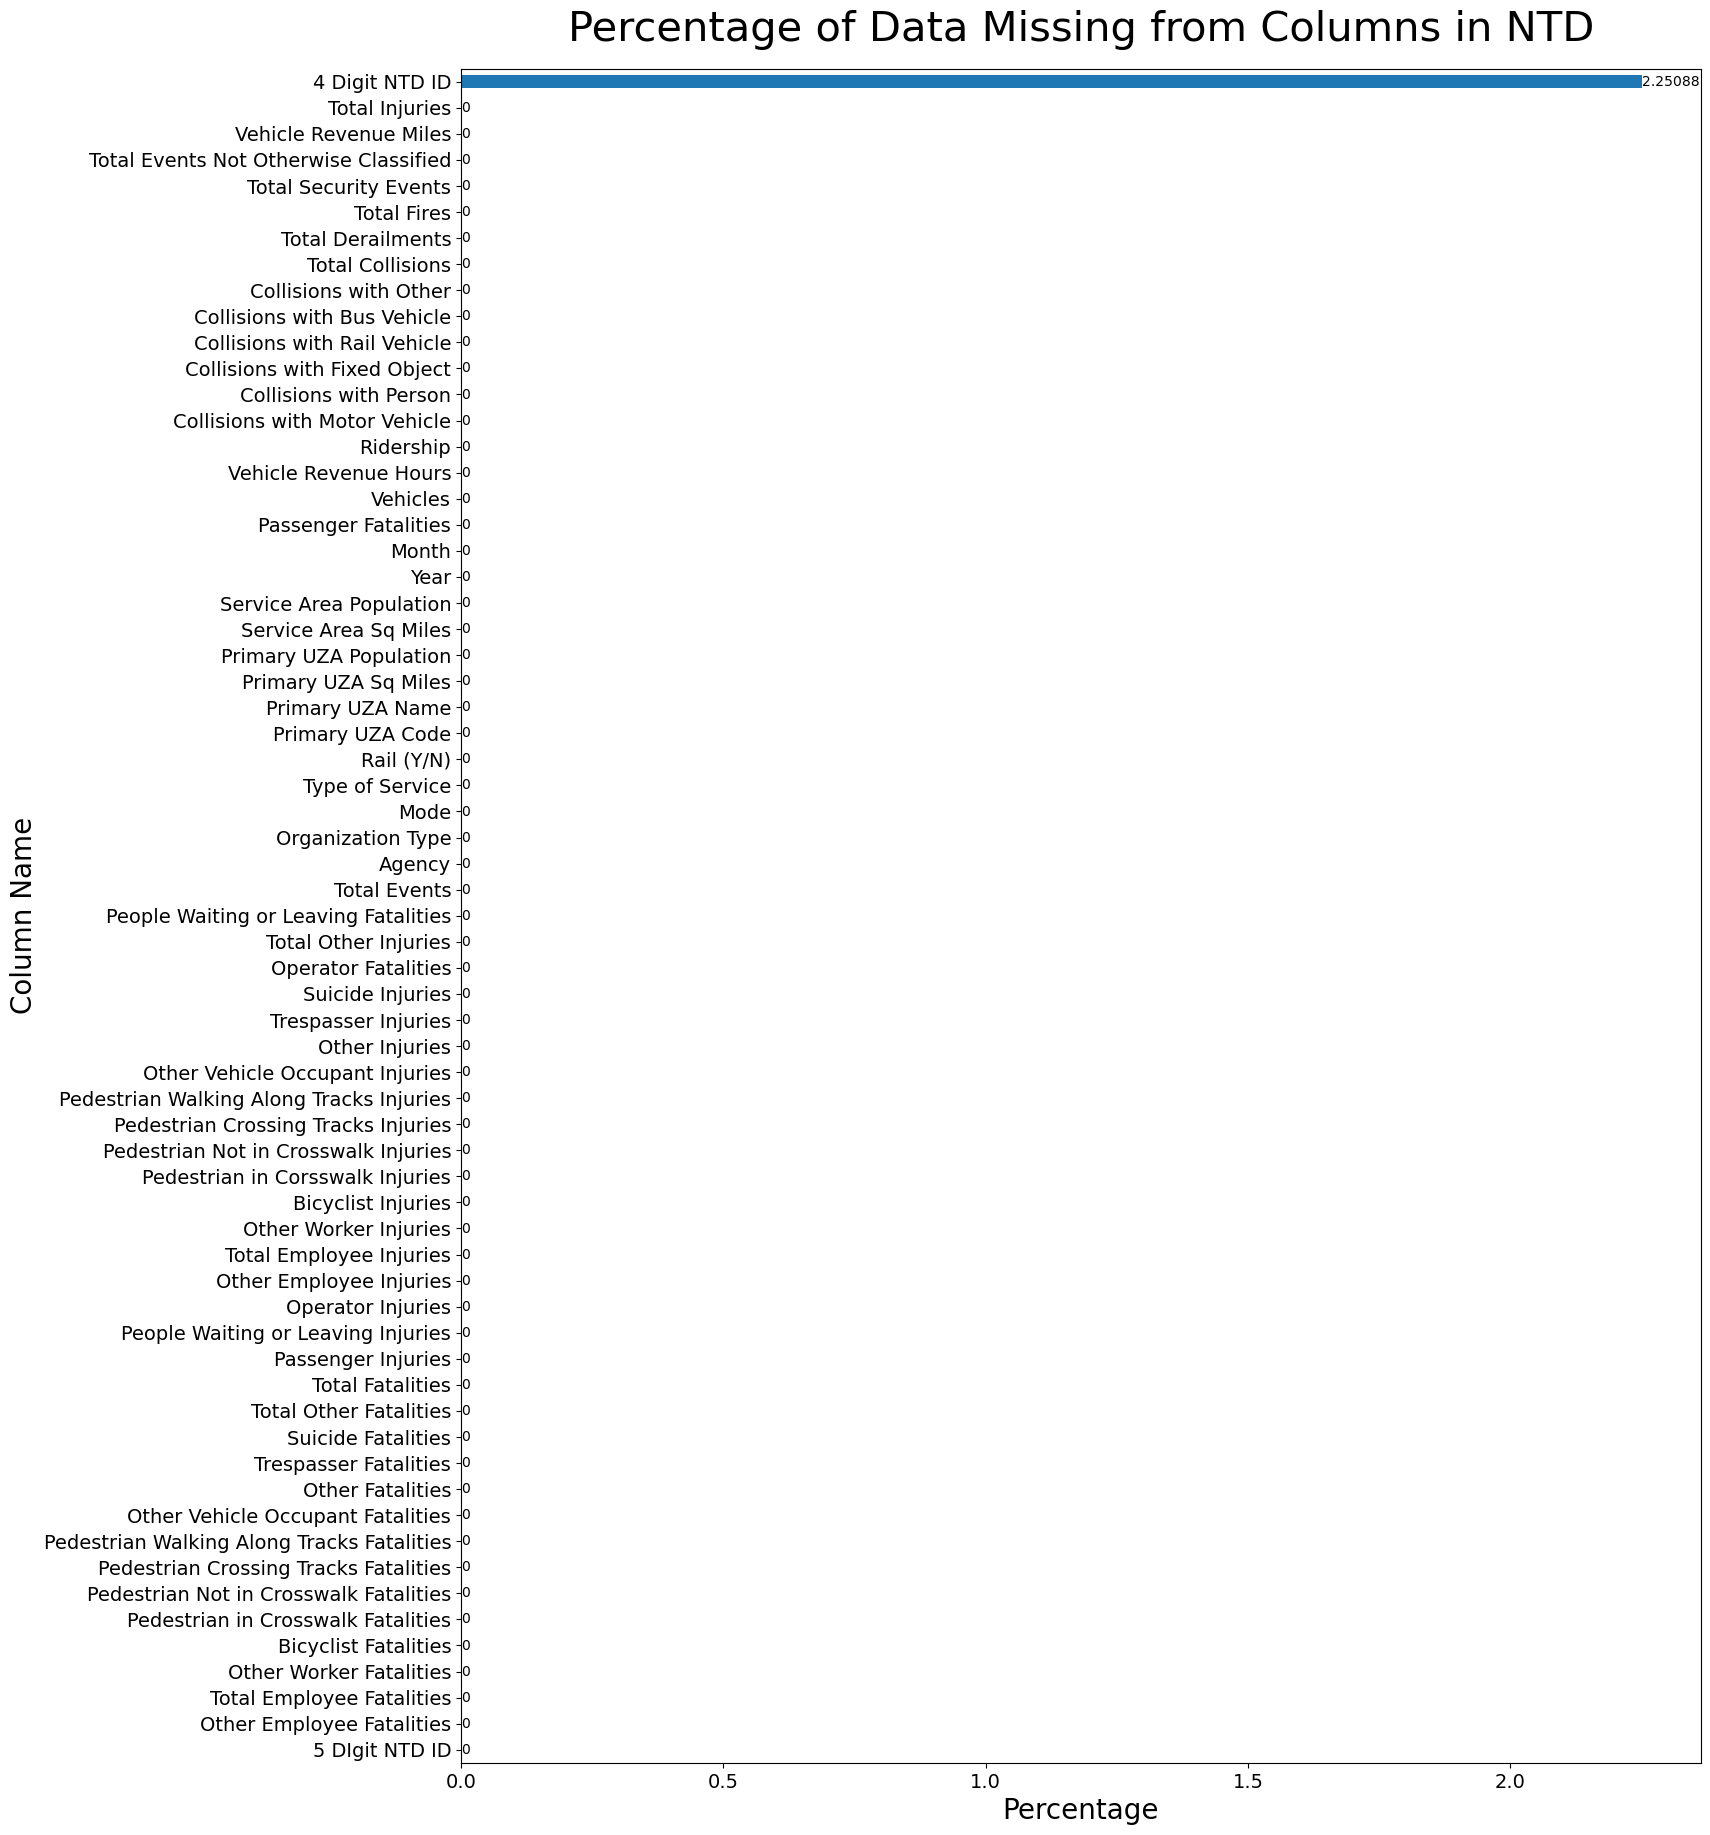

In [54]:
missingpercent = (100 * data.isnull().mean())

plt.figure(figsize=(16,22))
ax = missingpercent.sort_values(ascending=True).plot(kind='barh', fontsize=14)
ax.bar_label(ax.containers[0], padding=0.2)
ax.set_title('Percentage of Data Missing from Columns in NTD', fontsize=30, pad=20)
ax.set_xlabel('Percentage', fontsize=20)
ax.set_ylabel('Column Name', fontsize=20)


In [55]:
data.shape

(133148, 65)

### 1.6.2 Determining the Primary Identifier
<a id='1.6.2_Determining_the_Primary_Identifier'></a>

The '5 DIgit NTD ID', '4 Digit NTD ID', and 'Agency' columns contain unique identifying information for each reporting agency.  All three should be explored to determine which should be used as a primary identifier, and whether both or just one of the ID column should be preserved in the database.

The number of unique values in the '5 DIgit NTD ID' column is greater than the number of unique values in the '4 Digit NTD ID' column which makes sence since the FTA refers to the '4 Digit NTD ID' as the legacy ID.
The number of unique  values in "5 DIgit NTD ID" and "Agency" are pretty close.

In [56]:
data['5 DIgit NTD ID'].nunique()


608

In [57]:
data['4 Digit NTD ID'].nunique()


571

In [58]:
data['Agency'].nunique()

607

#### 1.6.2.1 Comparing '5 DIgit NTD ID' and '4 Digit NTD ID'
<a id='1.6.2.1_Comparing_5_DIgit_NTD_ID_and_4_Digit_NTD_ID'></a>

There are 37 more unique '5 DIgit NTD ID's than '4 Digit NTD ID's in the dataframe.  This section will look at those 37 rows to see if a pattern emerges or if a reason can be inferred for the discrepancy.

In [59]:
#separating out the unique five digit IDs

five_unique = data[['5 DIgit NTD ID']].drop_duplicates().sort_values('5 DIgit NTD ID')
five_unique

,5 DIgit NTD ID
9564,00001
3874,00002
4828,00003
6770,00005
7897,00006
...,...
36810,91092
58760,99422
28663,99423
61236,99424


In [60]:
#separating out the unique four digit IDs

four_unique = data[['4 Digit NTD ID']].drop_duplicates().sort_values('4 Digit NTD ID')
four_unique

,4 Digit NTD ID
9564,0001
3874,0002
4828,0003
6770,0005
7897,0006
...,...
6571,9242
10821,9244
29295,9296
36810,9R02-137


There are 2997 rows of data for the 37 reporting agencies which have a '5 DIgit NTD ID' but no '4 Digit NTD ID'.  Looking at a subset of columns split into two sections will help with readability.  The columns with the numbers of accidents, injuries, and fatalities are not needed in this section.

In [61]:

five_not_four = data[data['4 Digit NTD ID'].isna()].sort_values(['5 DIgit NTD ID', 'Year'])
five_not_four_set1 = five_not_four[['5 DIgit NTD ID', '4 Digit NTD ID','Agency', 'Organization Type', 'Mode', 'Type of Service', 'Rail (Y/N)']].sort_values(['5 DIgit NTD ID'])
five_not_four_set1.shape

(2997, 7)

In [62]:
five_not_four = data[data['4 Digit NTD ID'].isna()].sort_values(['5 DIgit NTD ID', 'Year'])
five_not_four_set2 = five_not_four[['5 DIgit NTD ID', '4 Digit NTD ID','Primary UZA Code', 'Primary UZA Name', 'Primary UZA Sq Miles', 'Primary UZA Population', 'Service Area Sq Miles', 'Service Area Population', 'Year']].sort_values(['5 DIgit NTD ID'])
five_not_four_set2.shape

(2997, 9)

In [63]:
five_not_four_Agency_count = five_not_four['Agency'].nunique()
five_not_four_Agency_count

37

Looking at one row for each of the 37 '5 DIgit NTD ID's which do not have '4 Digit NTD ID's.

In [64]:
five_not_four_set1 = five_not_four_set1.drop_duplicates(subset='5 DIgit NTD ID', keep="first")
five_not_four_set1

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N)
49378,00415,NaN,Ada County Highway District,"City, County or Local Government Unit or Depar...",VP,DO,False
71137,10183,NaN,"Woods Hole, Martha's Vineyard and Nantucket St...",Independent Public Agency or Authority of Tran...,MB,DO,False
115275,11147,NaN,Rhode Island Department of Transportation,State Government Unit or Department of Transpo...,FB,PT,False
131166,11238,NaN,Bay State Cruise Company,Private-For-Profit Corporation,FB,DO,False
97326,11239,NaN,"Hyannis Harbor Tours, Inc.",Private-For-Profit Corporation,FB,DO,False
133143,20223,NaN,Cape May Lewes Ferry,Independent Public Agency or Authority of Tran...,FB,DO,False
133175,20226,NaN,"SeaStreak, LLC",Private-For-Profit Corporation,FB,DO,False
95378,22930,NaN,New York City Economic Development Corporation,Private-Non-Profit Corporation,MB,PT,False
96923,30201,NaN,City of Baltimore,"City, County or Local Government Unit or Depar...",MB,PT,False
90147,30202,NaN,South Central Transit Authority,Independent Public Agency or Authority of Tran...,DR,PT,False


In [65]:
five_not_four_set2 = five_not_four_set2.drop_duplicates(subset='5 DIgit NTD ID', keep="first")
five_not_four_set2

,5 DIgit NTD ID,4 Digit NTD ID,Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,Service Area Sq Miles,Service Area Population,Year
49378,00415,NaN,108,"Boise City, ID",134.0,349684.0,15134.0,814966.0,2016
71137,10183,NaN,152,"Barnstable Town, MA",277.0,246695.0,2100.0,242595.0,2018
115275,11147,NaN,39,"Providence, RI-MA",545.0,1190956.0,10.0,78813.0,2020
131166,11238,NaN,152,"Barnstable Town, MA",277.0,246695.0,277.0,221049.0,2021
97326,11239,NaN,152,"Barnstable Town, MA",277.0,246695.0,394.0,210049.0,2021
133143,20223,NaN,5,"Philadelphia, PA-NJ-DE-MD",1981.0,5441567.0,1187.0,332641.0,2021
133175,20226,NaN,1,"New York-Newark, NY-NJ-CT",3450.0,18351295.0,776.0,3658455.0,2021
95378,22930,NaN,1,"New York-Newark, NY-NJ-CT",3450.0,18351295.0,37.0,230065.0,2020
96923,30201,NaN,19,"Baltimore, MD",717.0,2203663.0,81.0,621849.0,2020
90147,30202,NaN,91,"Lancaster, PA",248.0,402004.0,1848.0,949401.0,2020


There is no clear reason why these 37 agencies are missing 4 dig IDs when others are not.  It will be better to use the '5 DIgit NTD ID' as the unique identifier instead of the '4 Digit NTD ID' since the '5 DIgit NTD ID' data is more complete, but the '4 Digit NTD ID' should be preserved in the dataframe in case it becomes useful for other purposes later on.


#### 1.6.2.2 Comparing '5 DIgit NTD ID' and 'Agency'
<a id='1.6.2.2_Comparing_5_DIgit_NTD_ID_and_Agency'></a>

Finding the reason why there are 608 unique '5 DIgit NTD ID's but only 607 for 'Agency'.

Creating a dataframe with unique combinations of '5 DIgit NTD ID' plus 'Agency'.  There are 608 rows which matches the number of unique '5 DIgit NTD ID's.

In [66]:
five_unique_with_agency = data[['5 DIgit NTD ID', 'Agency']].drop_duplicates().sort_values('5 DIgit NTD ID', ascending=True)
five_unique_with_agency


,5 DIgit NTD ID,Agency
9564,00001,King County Department of Metro Transit
3874,00002,Spokane Transit Authority
4828,00003,Pierce County Transportation Benefit Area Auth...
6770,00005,City of Everett
7897,00006,City of Yakima
...,...,...
36810,91092,Tahoe Transportation District
58760,99422,San Joaquin Council
28663,99423,City of Glendale
61236,99424,City of Pasadena


Looking to see if a NaN exists in 'Agency' for one of the unique '5 DIgit NTD ID's, but none is found.

In [67]:
solo = five_unique_with_agency[five_unique_with_agency['Agency'].isnull()]
solo

,5 DIgit NTD ID,Agency


Looking to see if an agency name appears twice, which it does. 

In [68]:
five_unique_with_agency[five_unique_with_agency.groupby('Agency')['Agency'].transform('size') > 1]


,5 DIgit NTD ID,Agency
5497,90034,City of Glendale
28663,99423,City of Glendale


The discrepency between the number of unique '5 DIgit NTD ID's and unique 'Agency' names is due to there being 'City of Glendale' agencies in both Arizona and in California.  There are no errors or missing data.

When using this data later, though, it will need to be sorted by 'Agency' + '5 DIgit NTD ID' or 'Primary UZA Name' in oder for these two agencies to be kept separate.


In [69]:
data[data['Agency'] == 'City of Glendale'].sort_values('5 DIgit NTD ID')

,5 DIgit NTD ID,4 Digit NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (Y/N),Primary UZA Code,Primary UZA Name,Primary UZA Sq Miles,...,Pedestrian in Corsswalk Injuries,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries
5497,90034,9034,City of Glendale,"City, County or Local Government Unit or Depar...",DR,DO,False,12,"Phoenix-Mesa, AZ",1147.0,...,0,0,0,0,0,0,0,0,0,0
74608,90034,9034,City of Glendale,"City, County or Local Government Unit or Depar...",DR,DO,False,12,"Phoenix-Mesa, AZ",1147.0,...,0,0,0,0,0,0,0,0,0,0
124643,90034,9034,City of Glendale,"City, County or Local Government Unit or Depar...",MB,DO,False,12,"Phoenix-Mesa, AZ",1147.0,...,0,0,0,0,0,0,0,0,0,0
74610,90034,9034,City of Glendale,"City, County or Local Government Unit or Depar...",DR,DO,False,12,"Phoenix-Mesa, AZ",1147.0,...,0,0,0,0,0,0,0,0,0,0
74611,90034,9034,City of Glendale,"City, County or Local Government Unit or Depar...",DR,DO,False,12,"Phoenix-Mesa, AZ",1147.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90040,99423,NaN,City of Glendale,"City, County or Local Government Unit or Depar...",DR,PT,False,2,"Los Angeles-Long Beach-Anaheim, CA",1736.0,...,0,0,0,0,0,0,0,0,0,0
90041,99423,NaN,City of Glendale,"City, County or Local Government Unit or Depar...",DR,PT,False,2,"Los Angeles-Long Beach-Anaheim, CA",1736.0,...,0,0,0,0,0,0,0,0,0,0
42492,99423,NaN,City of Glendale,"City, County or Local Government Unit or Depar...",DR,PT,False,2,"Los Angeles-Long Beach-Anaheim, CA",1736.0,...,0,0,0,0,0,0,0,0,0,0
90022,99423,NaN,City of Glendale,"City, County or Local Government Unit or Depar...",MB,PT,False,2,"Los Angeles-Long Beach-Anaheim, CA",1736.0,...,0,0,0,0,0,0,0,0,0,0


#### 1.6.2.3 The Winning Combination
<a id='1.6.2.3_The_Winning_Combination'></a> 


Looking to see if the '5 DIgit NTD ID' is truely a unique identifier.

There are 608 unique '5 DIgit NTD ID's in the dataframe.

In [70]:
test_of_uniqueness_1 = data[['5 DIgit NTD ID']].sort_values(['5 DIgit NTD ID'])
test_of_uniqueness_1 = test_of_uniqueness_1.drop_duplicates(subset = ['5 DIgit NTD ID'], keep = 'last')
test_of_uniqueness_1.shape

(608, 1)

When sorted with 'Agency', there are still 608 rows, which means that each '5 DIgit NTD ID' is represented exactly once.

In [71]:
test_of_uniqueness_2 = data[['5 DIgit NTD ID','Agency']].sort_values(['5 DIgit NTD ID','Agency'])
test_of_uniqueness_2 = test_of_uniqueness_2.drop_duplicates(subset = ['5 DIgit NTD ID','Agency'], keep = 'last')
test_of_uniqueness_2.shape


(608, 2)

When sorted with '4 Digit NTD ID', there are still 608 rows, which means that each '5 DIgit NTD ID' is represented exactly once.

In [72]:
test_of_uniqueness_3 = data[['5 DIgit NTD ID', '4 Digit NTD ID']].sort_values(['5 DIgit NTD ID', '4 Digit NTD ID'])
test_of_uniqueness_3 = test_of_uniqueness_3.drop_duplicates(subset = ['5 DIgit NTD ID','4 Digit NTD ID'], keep = 'last')
test_of_uniqueness_3.shape

(608, 2)

Caution: When sorted with both 'Agency', and 'Primary UZA Name', there are 611 rows.  This occurs because of the three agencies which each serve and report for two different 'Primary UZA Names'.  

In [73]:
test_of_uniqueness_4 = data[['5 DIgit NTD ID','Agency', 'Primary UZA Name']].sort_values(['5 DIgit NTD ID','Agency', 'Primary UZA Name'])
test_of_uniqueness_4 = test_of_uniqueness_4.drop_duplicates(subset = ['5 DIgit NTD ID','Agency', 'Primary UZA Name'], keep = 'last')
test_of_uniqueness_4.shape

(611, 3)

The '5 DIgit NTD ID' is a unique identifier for this dataframe.  It is unique to each agency and there is, now that we have cleaned, no missing data in that column.  

However, there are two limitations/cautions when using this field by itself and in combination in the search for uniqueness. 

1.  In section 1.6.1.2.2, it was discovered that there were three '5 DIgit NTD ID's which each served and reported for two different 'Primary UZA Name's.  So, dropping duplicates of '5 DIgit NTD ID's would drop one of the two 'Primary UZA Name's and therefore service areas (likely desirable data) for each of the those three agencies.

2.  Then, in section 1.6.2.2, it was found that two different '5 DIgit NTD ID's were listed with the same 'Agency', but each of those 'Agency's had a unique 'Primary UZA Name' due to them actually being distinct entities in different states.  Dropping duplicate '5 DIgit NTD ID's is not a problem here but caution would need to be taken at other times to make sure the data for the two "City of Glendale" agencies won't unintentially be combined.


### 1.6.3 Changing Data Type of 'Rail (Y/N)' Column
<a id='1.6.3_Rail'></a>

Removing the NANs in the Agency column also removed the NaNs in the 'Rail (Y/N)' column.  So, the data type can now be changed to bool.

In [74]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing

,count,%
5 DIgit NTD ID,0,0.000000
4 Digit NTD ID,2997,2.250879
Agency,0,0.000000
Organization Type,0,0.000000
Mode,0,0.000000
Type of Service,0,0.000000
Rail (Y/N),0,0.000000
Primary UZA Code,0,0.000000
Primary UZA Name,0,0.000000
Primary UZA Sq Miles,0,0.000000


In [75]:
data['Rail (Y/N)'] = data['Rail (Y/N)'].astype(bool)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133148 entries, 0 to 133190
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   5 DIgit NTD ID                              133148 non-null  object 
 1   4 Digit NTD ID                              130151 non-null  object 
 2   Agency                                      133148 non-null  object 
 3   Organization Type                           133148 non-null  object 
 4   Mode                                        133148 non-null  object 
 5   Type of Service                             133148 non-null  object 
 6   Rail (Y/N)                                  133148 non-null  bool   
 7   Primary UZA Code                            133148 non-null  int64  
 8   Primary UZA Name                            133148 non-null  object 
 9   Primary UZA Sq Miles                        133148 non-null  float64
 

## 1.7 Save Data
<a id='1.7_Save_Data'></a>  

In [77]:
data.to_csv("data_cleaned.csv", index=False)


## 1.8 Summary
<a id='1.8_Summary'></a>

At the beginning of this notebook the dataframe contained 133,196 rows of data and 65 columns.  Fourty eight rows were found to have no identifiers and so were removed, leaving 133,148 rows of data with no loss of columns. 

Over 4000 rows of were found to be missing data in one or more of the 'Primary UZA Name', 'Primary UZA Sq Miles', 'Primary UZA Population', 'Organization Type', 'Service Area Sq Miles', and 'Service Area Population' columns.  All but 27 rows of data were able to be filled using appropriate data found elsewhere in the dataframe.  The remaining 27 rows which are all associate with The East Central Iowa Council of Governments ('5 DIgit NTD ID' 70138), were filled by information available online through the FTA.

The '5 DIgit NTD ID', '4 Digit NTD ID', and 'Agency' columns were explored to determine which should be used as the primary identifier going forward.  The '5 DIgit NTD ID' was chosen because it is the only one of the three which has an entry for all of the 133,148 rows of data and which is completely unique for each reporting agency.  However, three different '5 DIgit NTD ID's were each found to be (correctly) associated with two distinct 'Primary UZA Names', and two separate '5 DIgit NTD ID's were found to have 'Agency's of the same name but with distinct 'Primary UZA Name's.  So, caution will be required when sorting data in future notebooks.

The Data Type for the 'Rail (Y/N)' column was changed to 'bool', having been made possible by the removal of all the rows containing NaNs in that column when the 48 rows were removed earlier in the notebook.

During the exploratory data analysis phase of the project, decisions will need to be made about the usefulness of keeping the '4 Digit NTD ID' column.
